# TP4 - Arroyo Joaquin, Bolzan Francisco y Montoro Emiliano
# Ejercicio 1
##1) Preparación de los datos
### a)
Implementar una función que lea el archivo y devuelva un objeto con los atributos:

● data: Tiene que contener los atributos de los datos

● target: Tiene que contener la clase a la que pertenece cada dato

● feature_names: Tiene que ser una lista con el nombre de los 20 atributos

● target_names: Tiene que ser una lista con el nombre de las clases

In [1]:
!nvidia-smi

Wed Jun 21 21:47:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!gdown --fuzzy https://drive.google.com/file/d/1D4a3Q0UXV5I7DVq1OqnK9ElG-klbc03n/view?usp=drive_link

Downloading...
From: https://drive.google.com/uc?id=1D4a3Q0UXV5I7DVq1OqnK9ElG-klbc03n
To: /content/credit_data.csv
100% 139k/139k [00:00<00:00, 96.6MB/s]


In [3]:
import pandas as pd

# Funcion para leer el dataset
def read_file(filename):
    data = pd.read_csv(filename)
    feature_names = data.columns[:-1].tolist()  # Obtener los nombres de las columnas de atributos
    target_names = data[data.columns[-1]].unique().tolist()  # Obtener los valores únicos de la columna de clase

    return {
        "attributes": data.iloc[:, :-1],  # Obtener los datos de los atributos
        "target": data.iloc[:, -1],  # Obtener los datos de la clase
        "feature_names": feature_names,
        "target_names": target_names
    }


In [4]:
filename = "credit_data.csv"
data = read_file(filename)

In [5]:
# Imprimo informacion para analizar el conjunto de datos
print("Los atributos de entrada son: {}.".format(data["feature_names"]))
print("Las clases que intentaremos predecir son: {}.".format(data["target_names"]))
print("El formato de la matriz de datos es: {}.".format(data["attributes"].shape))
print("El formato de la matriz de etiquetas es: {}.".format(data["target"].shape))


Los atributos de entrada son: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker'].
Las clases que intentaremos predecir son: ['good', 'bad'].
El formato de la matriz de datos es: (1000, 20).
El formato de la matriz de etiquetas es: (1000,).


In [6]:
import numpy as np

# Contar las ocurrencias de cada clase
unique_classes, class_counts = np.unique(data["target"], return_counts=True)

# Imprimir la cantidad de muestras por clases
for i in range(len(unique_classes)):
    print("Clase {}: {}".format(unique_classes[i], class_counts[i]))

Clase bad: 300
Clase good: 700


### b)
Para poder entrenar cualquier modelo de aprendizaje automatizado es necesario
transformar los valores de los atributos en tipos numéricos. Por lo tanto, se requiere implementar una función o celda de código que tome la variable devuelta por la función del punto anterior y transforme los atributos que no son de tipo numérico en números.

Pista: Una forma de transformar los tipos de datos no numéricos en numéricos es utilizando la clase OrdinalEncoder de SciKit-Learn.


In [7]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Funcion para transformar datos no numericos
def transform_data(data):
    attributes = data["attributes"].copy()
    target = data["target"].copy()

    # Obtener los índices de las columnas que contienen atributos no numéricos
    no_numeric_attributes = attributes.select_dtypes(exclude="number").columns

    # Transformar los atributos no numéricos utilizando el OrdinalEncoder
    encoder = OrdinalEncoder()
    attributes[no_numeric_attributes] = encoder.fit_transform(attributes[no_numeric_attributes])

    # Transformar las clases no numéricas utilizando el LabelEncoder
    encoder = LabelEncoder()
    target = encoder.fit_transform(target)

    data["attributes"] = attributes
    data["target"] = target
    return data


In [8]:
transformed_data = transform_data(data)

### c)
Dividir el conjunto de datos en entrenamiento y evaluación utilizando la función
train_test_split de SciKit-Learn. El conjunto de evaluación debe tener el 10% de las muestras totales del dataset. Se debe configurar el parámetro random_state en 0.

In [9]:
from sklearn.model_selection import train_test_split

transformed_attributes = transformed_data["attributes"]
transformed_target = transformed_data["target"]

data_train, data_test, target_train, target_test = train_test_split(transformed_attributes,
                                                                    transformed_target,
                                                                    test_size=0.1,
                                                                    random_state=0)

print("Ahora, el conjunto de entrenamiento tiene {} muestras y el de evaluación tiene {} muestras.".format(data_train.shape[0], data_test.shape[0]))



Ahora, el conjunto de entrenamiento tiene 900 muestras y el de evaluación tiene 100 muestras.


## 2) Entrenamiento de modelo
### a)
Entrenar un árbol de decisión sobre el conjunto de entrenamiento, con los parámetros por defecto que trae el árbol. Utilizar la métrica accuracy para medir el modelo entrenado sobre el conjunto de entrenamiento y evaluación. ¿Qué efectos observa sobre ese árbol? ¿Cómo
los explica?

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el modelo y lo entrenamos con los parametros por defecto
tree_model_a = DecisionTreeClassifier()

# Utilizamos el conjunto de datos de entrenamiento
tree_model_a.fit(data_train, target_train)

DecisionTreeClassifier()

In [11]:
from sklearn.metrics import accuracy_score

# Utilizo el conjunto de evaluación data_test para predecir mediante el arbol ya entrenado
target_predicted_a = tree_model_a.predict(data_test)

# Calculo el valor de accuracy obtenido
accuracy = accuracy_score(target_test, target_predicted_a)

print("El valor de accuracy obtenido sobre el dataset de testing es: {}".format(accuracy))

# Utilizo el conjunto de evaluación data_train para predecir mediante el arbol ya entrenado
target_predicted = tree_model_a.predict(data_train)

# Calculo el valor de accuracy obtenido
accuracy = accuracy_score(target_train, target_predicted)

print("El valor de accuracy obtenido sobre el dataset de entrenamiento es: {}".format(accuracy))

El valor de accuracy obtenido sobre el dataset de testing es: 0.68
El valor de accuracy obtenido sobre el dataset de entrenamiento es: 1.0


### b)
Utilizar la clase GridSearchCV para encontrar la mejor combinación de parámetros de parada para el modelo empleando la métrica accuracy.


In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [None, 5, 10, 15, 20],
    'max_leaf_nodes': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10, 12]
}

grid_search = GridSearchCV(tree_model_a, parameters, scoring='accuracy')

grid_search.fit(data_train, target_train)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_


In [13]:
print("Mejores parámetros: {}".format(best_parameters))
print("Mejor puntuación: {:.2f}".format(best_score))

Mejores parámetros: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_samples_split': 12}
Mejor puntuación: 0.75


In [14]:
# Crear una instancia del modelo DecisionTreeClassifier con los mejores parámetros
tree_model_b = DecisionTreeClassifier(**best_parameters)

# Entrenar el modelo con los datos de entrenamiento
tree_model_b.fit(data_train, target_train)

DecisionTreeClassifier(max_leaf_nodes=20, min_samples_leaf=4,
                       min_samples_split=12)

In [15]:
# Utilizo el conjunto de evaluación data_test para predecir mediante el arbol ya entrenado
target_predicted_b = tree_model_b.predict(data_test)

# Calculo el valor de accuracy obtenido
accuracy = accuracy_score(target_test, target_predicted_b)

print("El valor de accuracy obtenido sobre el dataset de testing es: {}".format(accuracy))

# Utilizo el conjunto de evaluación data_train para predecir mediante el arbol ya entrenado
target_predicted = tree_model_b.predict(data_train)

# Calculo el valor de accuracy obtenido
accuracy = accuracy_score(target_train, target_predicted)

print("El valor de accuracy obtenido sobre el dataset de entrenamiento es: {}".format(accuracy))

El valor de accuracy obtenido sobre el dataset de testing es: 0.72
El valor de accuracy obtenido sobre el dataset de entrenamiento es: 0.8177777777777778


### c)
Sobre el modelo entrenado en el punto (a), realizar poda por niveles y graficar cómo varía el valor de accuracy sobre el conjunto de entrenamiento y evaluación para cada nivel de poda. ¿Cuál considera que es el nivel de poda óptimo y por qué?

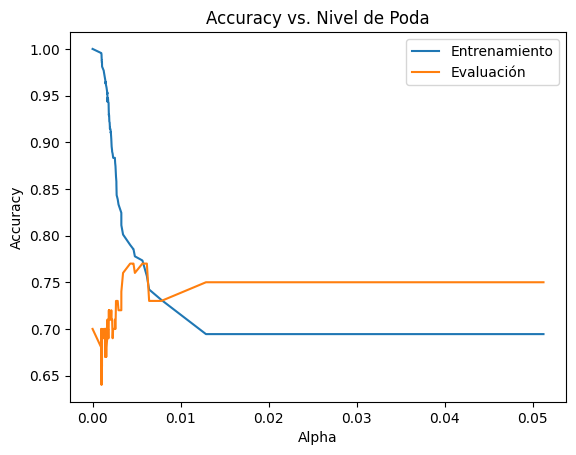

In [16]:
import matplotlib.pyplot as plt

# Realizar la poda por niveles
path = tree_model_a.cost_complexity_pruning_path(data_train, target_train)
alphas = path.ccp_alphas

# Inicializar listas para almacenar los valores de accuracy
accuracies_entrenamiento = []
accuracies_evaluacion = []
best_alpha, best_accuracy = 0, 0

# Realizar la poda para cada nivel de alpha
for alpha in alphas:
    # Establecer el valor de alpha en el modelo
    tree_model_a.set_params(ccp_alpha=alpha)

    # Entrenar el modelo con los datos de entrenamiento
    tree_model_a.fit(data_train, target_train)

    # Predecir las clases para los datos de entrenamiento y evaluación
    prediccion_entrenamiento = tree_model_a.predict(data_train)
    prediccion_evaluacion = tree_model_a.predict(data_test)

    # Calcular el accuracy para los datos de entrenamiento y evaluación
    accuracy_entrenamiento = accuracy_score(target_train, prediccion_entrenamiento)
    accuracy_evaluacion = accuracy_score(target_test, prediccion_evaluacion)

    if accuracy_evaluacion > best_accuracy:
      best_alpha, best_accuracy = alpha, accuracy_evaluacion

    # Agregar los valores de accuracy a las listas
    accuracies_entrenamiento.append(accuracy_entrenamiento)
    accuracies_evaluacion.append(accuracy_evaluacion)

# Graficar los valores de accuracy en función del nivel de poda
plt.plot(alphas, accuracies_entrenamiento, label='Entrenamiento')
plt.plot(alphas, accuracies_evaluacion, label='Evaluación')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Nivel de Poda')
plt.legend()
plt.show()

In [17]:
# Crear una instancia del modelo DecisionTreeClassifier con el mejor alpha
tree_model_c = DecisionTreeClassifier(ccp_alpha = best_alpha)

# Entrenar el modelo con los datos de entrenamiento
tree_model_c.fit(data_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.004271541950113377)

In [18]:
# Utilizo el conjunto de evaluación data_test para predecir mediante el arbol ya entrenado
target_predicted_c = tree_model_c.predict(data_test)

# Calculo el valor de accuracy obtenido
accuracy = accuracy_score(target_test, target_predicted_c)

print("El valor de accuracy obtenido sobre el conjunto de testing es: {}".format(accuracy))

# Utilizo el conjunto de evaluación data_train para predecir mediante el arbol ya entrenado
target_predicted = tree_model_c.predict(data_train)

# Calculo el valor de accuracy obtenido
accuracy = accuracy_score(target_train, target_predicted)

print("El valor de accuracy obtenido sobre el conjunto de entrenamiento es: {}".format(accuracy))

El valor de accuracy obtenido sobre el conjunto de testing es: 0.77
El valor de accuracy obtenido sobre el conjunto de entrenamiento es: 0.79


## 3) Evaluación de modelo
a) Teniendo en cuenta el contexto del problema que se pretende resolver: ¿Cuál diría que es la mejor métrica para medir el funcionamiento de los modelos entrenados y por qué?

b) Utilizar esta métrica para medir la performance del modelo entrenado en el punto (2b) y (2c). Repetir los experimentos realizados en dichos puntos y evaluar si cambian los parámetros de configuración o el nivel de poda para el mejor árbol.

### Analisis sobre el arbol del ejercicio 2b

In [19]:
from sklearn.metrics import confusion_matrix, recall_score

# Calcular la matriz de confusión
cmb = confusion_matrix(target_test, target_predicted_b)

# Extraer los valores de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN)
TP = cmb[1, 1]
FP = cmb[0, 1]
TN = cmb[0, 0]
FN = cmb[1, 0]

# Calcular el fallout (tasa de falsos positivos)
specificity = TN / (FP + TN)

# Calcular el recall (tasa de verdaderos positivos)
recall = recall_score(target_test, target_predicted_b)

# Calculamos el accuracy
accuracy = accuracy_score(target_test, target_predicted_b)

print("El valor de la medida specificity(TN/N) es {}".format(specificity))
print("El valor de la medida recall(TP/P) es {}".format(recall))
print("El valor de la medida accuracy es {}".format(accuracy))


El valor de la medida specificity(TN/N) es 0.36
El valor de la medida recall(TP/P) es 0.84
El valor de la medida accuracy es 0.72


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm):
    # Calcular la matriz de confusión

    # Crear una figura y un eje
    fig, ax = plt.subplots()

    # Crear el mapa de calor de la matriz de confusión
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

    # Configurar etiquetas de los ejes x e y
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

    # Configurar título del gráfico
    ax.set_title('Confusion Matrix')

    # Mostrar el gráfico
    plt.show()

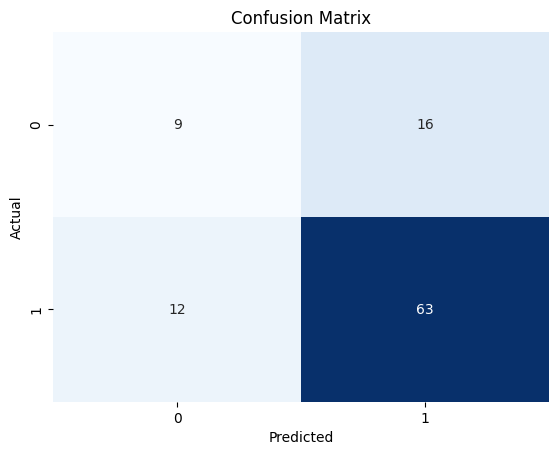

In [21]:
plot_confusion_matrix(cmb)

### Analisis sobre el arbol del ejercicio 2c

In [22]:
# Calcular la matriz de confusión
cmc = confusion_matrix(target_test, target_predicted_c)

# Extraer los valores de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN)
TP = cmc[1, 1]
FP = cmc[0, 1]
TN = cmc[0, 0]
FN = cmc[1, 0]

# Calcular el fallout (tasa de falsos positivos)
specificity = TN / (FP + TN)

# Calcular el recall (tasa de verdaderos positivos)
recall = recall_score(target_test, target_predicted_c)

# Calculamos el accuracy
accuracy = accuracy_score(target_test, target_predicted_c)

print("El valor de la medida specificity(TN/N) es {}".format(specificity))
print("El valor de la medida recall(TP/P) es {}".format(recall))
print("El valor de la medida accuracy es {}".format(accuracy))

El valor de la medida specificity(TN/N) es 0.44
El valor de la medida recall(TP/P) es 0.88
El valor de la medida accuracy es 0.77


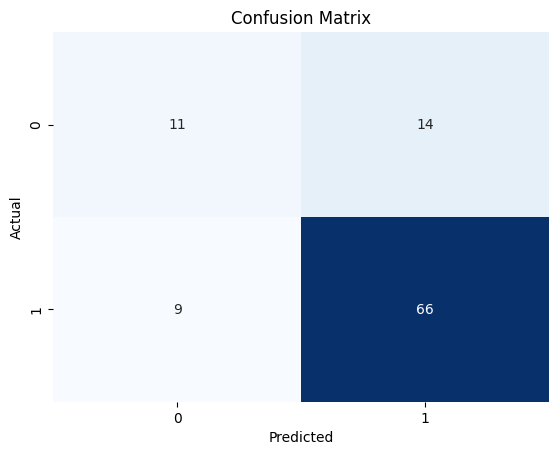

In [23]:
plot_confusion_matrix(cmc)

## Posible combinación

Al árbol podado le buscamos los mejores parámetros

In [24]:
grid_search = GridSearchCV(tree_model_c, parameters, scoring='accuracy')

grid_search.fit(data_train, target_train)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_


In [25]:
print("Mejores parámetros: {}".format(best_parameters))
print("Mejor puntuación: {:.2f}".format(best_score))

Mejores parámetros: {'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
Mejor puntuación: 0.74


In [26]:
# Crear una instancia del modelo DecisionTreeClassifier con los mejores parámetros
tree_model_d = DecisionTreeClassifier(ccp_alpha=best_alpha, **best_parameters)

# Entrenar el modelo con los datos de entrenamiento
tree_model_d.fit(data_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.004271541950113377, max_depth=5,
                       min_samples_leaf=8)

In [27]:
# Utilizo el conjunto de evaluación data_test para predecir mediante el arbol ya entrenado
target_predicted_d = tree_model_d.predict(data_test)

# Calculo el valor de accuracy obtenido
accuracy = accuracy_score(target_test, target_predicted_d)

print("El valor de accuracy obtenido sobre el dataset de testing es: {}".format(accuracy))

# Utilizo el conjunto de evaluación data_train para predecir mediante el arbol ya entrenado
target_predicted = tree_model_d.predict(data_train)

# Calculo el valor de accuracy obtenido
accuracy = accuracy_score(target_train, target_predicted)

print("El valor de accuracy obtenido sobre el dataset de entrenamiento es: {}".format(accuracy))

El valor de accuracy obtenido sobre el dataset de testing es: 0.76
El valor de accuracy obtenido sobre el dataset de entrenamiento es: 0.7755555555555556


In [28]:
# Calcular la matriz de confusión
cmd = confusion_matrix(target_test, target_predicted_d)

# Extraer los valores de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN)
TP = cmd[1, 1]
FP = cmd[0, 1]
TN = cmd[0, 0]
FN = cmd[1, 0]

# Calcular el fallout (tasa de falsos positivos)
specificity = TN / (FP + TN)

# Calcular el recall (tasa de verdaderos positivos)
recall = recall_score(target_test, target_predicted_d)

# Calculamos el accuracy
accuracy = accuracy_score(target_test, target_predicted_d)

print("El valor de la medida specificity(TN/N) es {}".format(specificity))
print("El valor de la medida recall(TP/P) es {}".format(recall))
print("El valor de la medida accuracy es {}".format(accuracy))

El valor de la medida specificity(TN/N) es 0.52
El valor de la medida recall(TP/P) es 0.84
El valor de la medida accuracy es 0.76


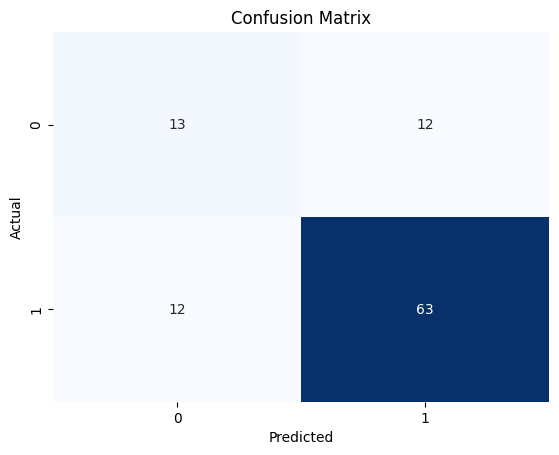

In [29]:
plot_confusion_matrix(cmd)

# Ejercicio 2
##1) Análisis del dataset
 Realizar un análisis del mismo indicando: cantidad de muestras, cantidad de clases, y
cantidad de muestras por clase. Grafique una muestra de las imágenes para cada clase.

In [30]:
!gdown 1KqgzDAGLvJxyEn7ewy11J1jXcyuoAo_w
!gdown 1RFeimal-QVwIvFlIeHB4NzzSb6uFVgYX

Downloading...
From: https://drive.google.com/uc?id=1KqgzDAGLvJxyEn7ewy11J1jXcyuoAo_w
To: /content/fashion-mnist_train.csv
100% 133M/133M [00:01<00:00, 70.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RFeimal-QVwIvFlIeHB4NzzSb6uFVgYX
To: /content/fashion-mnist_test.csv
100% 22.2M/22.2M [00:00<00:00, 54.8MB/s]


In [31]:
import pandas as pd

# Modificamos la función para leer el dataset
def read_file(filename):
    data = pd.read_csv(filename)
    target_names = data[data.columns[0]].unique()  # Obtener los valores únicos de la columna de clase

    return {
        "attributes": data.iloc[:, 1:].to_numpy(),  # Obtener los datos de los atributos
        "target": data.iloc[:, 0].to_numpy(),  # Obtener los datos de la clase
        "target_names": target_names
    }

filename = "fashion-mnist_train.csv"
fashion_data_train = read_file(filename)

filename = "fashion-mnist_test.csv"
fashion_data_test = read_file(filename)

In [32]:
print("Cantidad de clases: {}.".format(len(fashion_data_train["target_names"])))
print("Cantidad de muestras de entrenamiento: {}.".format(len(fashion_data_train["attributes"])))
print("Cantidad de muestras de test: {}.".format(len(fashion_data_test["attributes"])))

Cantidad de clases: 10.
Cantidad de muestras de entrenamiento: 60000.
Cantidad de muestras de test: 10000.


In [33]:
from collections import Counter

# Observamos la distribución de imágenes por clase
distr = Counter(fashion_data_train["target"])
print("Contador de instancias por clase: {}".format(distr))
print("Observamos entonces que hay 6000 instancias por cada clase")

Contador de instancias por clase: Counter({2: 6000, 9: 6000, 6: 6000, 0: 6000, 3: 6000, 4: 6000, 5: 6000, 8: 6000, 7: 6000, 1: 6000})
Observamos entonces que hay 6000 instancias por cada clase


Training images visualized:


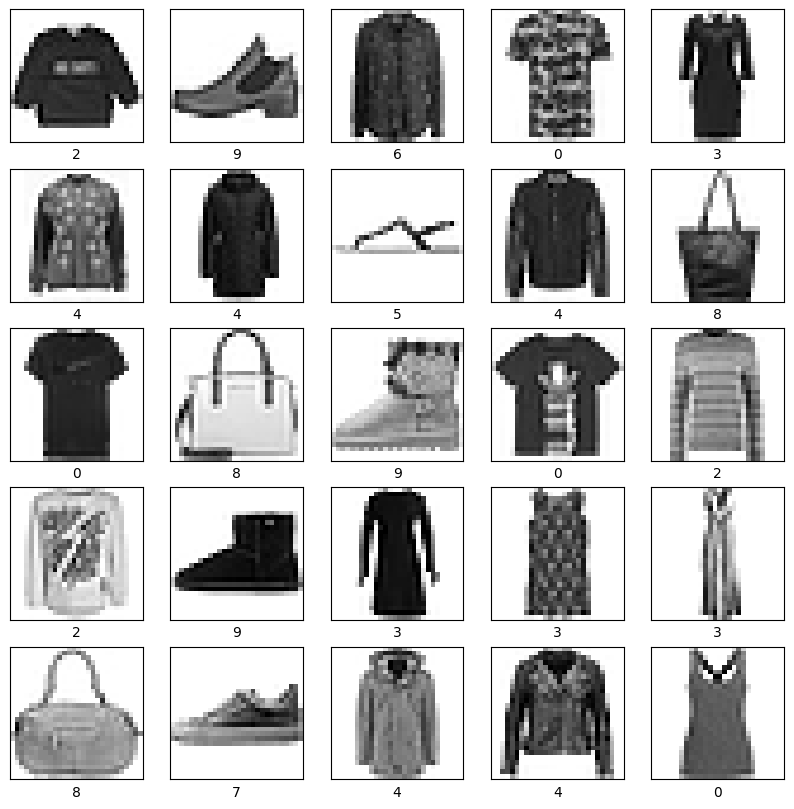

In [34]:
import matplotlib.pyplot as plt

def matrify(sequence):
  chunks, chunk_size = len(sequence), len(sequence)//28
  return [ sequence[i:i+chunk_size] for i in range(0, chunks, chunk_size) ]

# Visualizamos algunos de los elementos para verificar que el dataset sea leído de manera correcta
print("Training images visualized:")
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(matrify(fashion_data_train["attributes"][i]), cmap=plt.cm.binary)
    plt.xlabel(fashion_data_train["target"][i])
plt.show()

## 2) Entrenamiento de la red neuronal
### a)
Crear redes neuronales con las siguientes configuraciones y entrenarlas utilizando el conjunto de datos de entrenamiento durante 40 épocas:
* Sin capa oculta
* Con dos capas ocultas: una de 100 neuronas y otra de 50 neuronas
* Con 6 capas ocultas: tres de 100 neuronas seguidas de otras tres de 50 neuronas

Utilizar un learning rate de 0.0001, batch_size de 16, optimizador tipo adam y funciones de activación tipo ReLU en todas las capas.

Realizar gráficas de la evolución del accuracy a lo largo del entrenamiento y comparar los valores finales de la misma sobre el conjunto de entrenamiento y validación. ¿Qué conclusiones saca para cada una de las situaciones?

In [35]:
import tensorflow as tf

# Escalamos los valores a un rango de 0 a 1
fashion_data_train["attributes"] = fashion_data_train["attributes"] / 255.0
fashion_data_test["attributes"] = fashion_data_test["attributes"] / 255.0

one_hot_target_train = tf.one_hot(fashion_data_train["target"], 10)
one_hot_target_test = tf.one_hot(fashion_data_test["target"], 10)


In [ ]:
# Modelo 1 (sin capa oculta)
model1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784)), # Como el input ya está aplanado la entrada es de 784
    tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model1_score = model1.fit(fashion_data_train["attributes"],
                          one_hot_target_train,
                          batch_size=16,
                          epochs=40,
                          validation_data = (fashion_data_test["attributes"], one_hot_target_test))

Epoch 1/40
3750/3750 [==============================] - 16s 3ms/step - loss: 0.9090 - accuracy: 0.7036 - val_loss: 0.6573 - val_accuracy: 0.7848
Epoch 2/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.5992 - accuracy: 0.7997 - val_loss: 0.5651 - val_accuracy: 0.8120
Epoch 3/40
3750/3750 [==============================] - 15s 4ms/step - loss: 0.5395 - accuracy: 0.8200 - val_loss: 0.5238 - val_accuracy: 0.8267
Epoch 4/40
3750/3750 [==============================] - 18s 5ms/step - loss: 0.5091 - accuracy: 0.8286 - val_loss: 0.5017 - val_accuracy: 0.8333
Epoch 5/40
3750/3750 [==============================] - 19s 5ms/step - loss: 0.4896 - accuracy: 0.8343 - val_loss: 0.4861 - val_accuracy: 0.8397
Epoch 6/40
3750/3750 [==============================] - 19s 5ms/step - loss: 0.4758 - accuracy: 0.8392 - val_loss: 0.4751 - val_accuracy: 0.8437
Epoch 7/40
3750/3750 [==============================] - 16s 4ms/step - loss: 0.4652 - accuracy: 0.8418 - val_loss: 0.4687 - val_ac

In [ ]:
# Modelo 2 (2 capas ocultas)
model2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784)), # Como el input ya está aplanado la entrada es de 784
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model2_score = model2.fit(fashion_data_train["attributes"],
                          one_hot_target_train,
                          batch_size=16,
                          epochs=40,
                          validation_data = (fashion_data_test["attributes"], one_hot_target_test))

Epoch 1/40
3750/3750 [==============================] - 14s 3ms/step - loss: 0.6566 - accuracy: 0.7841 - val_loss: 0.4769 - val_accuracy: 0.8405
Epoch 2/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.4457 - accuracy: 0.8448 - val_loss: 0.4211 - val_accuracy: 0.8557
Epoch 3/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.4050 - accuracy: 0.8579 - val_loss: 0.4091 - val_accuracy: 0.8595
Epoch 4/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.3798 - accuracy: 0.8673 - val_loss: 0.3888 - val_accuracy: 0.8655
Epoch 5/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.3629 - accuracy: 0.8712 - val_loss: 0.3664 - val_accuracy: 0.8705
Epoch 6/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.3479 - accuracy: 0.8776 - val_loss: 0.3592 - val_accuracy: 0.8765
Epoch 7/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.3348 - accuracy: 0.8811 - val_loss: 0.3509 - val_ac

In [ ]:
# Modelo 3 (6 capas ocultas)
model3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784)), # Como el input ya está aplanado la entrada es de 784
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model3_score = model3.fit(fashion_data_train["attributes"],
                          one_hot_target_train,
                          batch_size=16,
                          epochs=40,
                          validation_data = (fashion_data_test["attributes"], one_hot_target_test))

Epoch 1/40
3750/3750 [==============================] - 18s 4ms/step - loss: 0.6614 - accuracy: 0.7636 - val_loss: 0.4711 - val_accuracy: 0.8316
Epoch 2/40
3750/3750 [==============================] - 16s 4ms/step - loss: 0.4375 - accuracy: 0.8429 - val_loss: 0.4162 - val_accuracy: 0.8570
Epoch 3/40
3750/3750 [==============================] - 15s 4ms/step - loss: 0.3875 - accuracy: 0.8602 - val_loss: 0.4059 - val_accuracy: 0.8561
Epoch 4/40
3750/3750 [==============================] - 15s 4ms/step - loss: 0.3617 - accuracy: 0.8695 - val_loss: 0.3496 - val_accuracy: 0.8732
Epoch 5/40
3750/3750 [==============================] - 15s 4ms/step - loss: 0.3403 - accuracy: 0.8774 - val_loss: 0.3475 - val_accuracy: 0.8728
Epoch 6/40
3750/3750 [==============================] - 17s 4ms/step - loss: 0.3244 - accuracy: 0.8824 - val_loss: 0.3302 - val_accuracy: 0.8785
Epoch 7/40
3750/3750 [==============================] - 15s 4ms/step - loss: 0.3089 - accuracy: 0.8869 - val_loss: 0.3240 - val_ac

Modelo 1



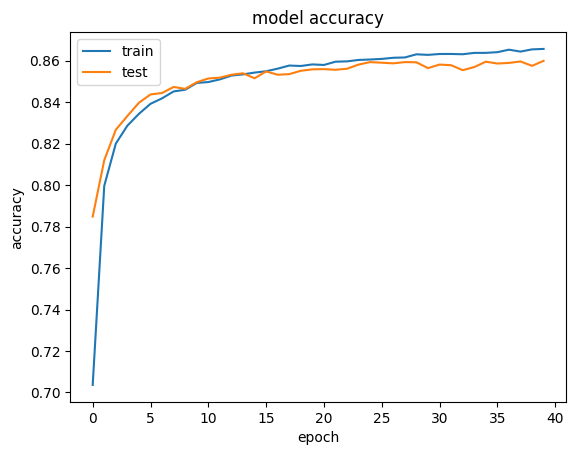

1875/1875 - 4s - loss: 0.3898 - accuracy: 0.8655 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.4162 - accuracy: 0.8599 - 609ms/epoch - 2ms/step
Test 1 accuracy: 0.8598999977111816
Train 1 accuracy: 0.8655499815940857

Modelo 2



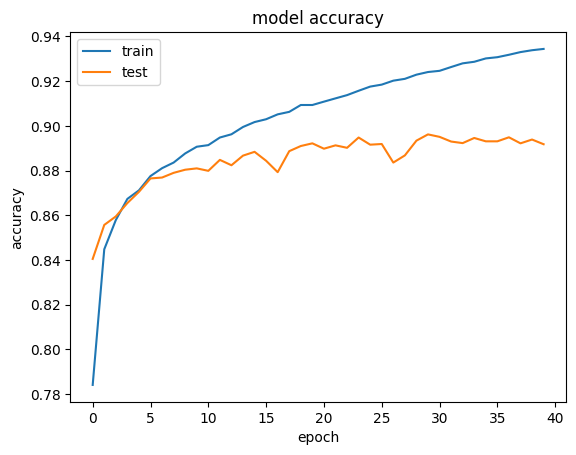

1875/1875 - 4s - loss: 0.1860 - accuracy: 0.9329 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.3156 - accuracy: 0.8918 - 901ms/epoch - 3ms/step
Test 2 accuracy: 0.8917999863624573
Train 2 accuracy: 0.9328833222389221

Modelo 3



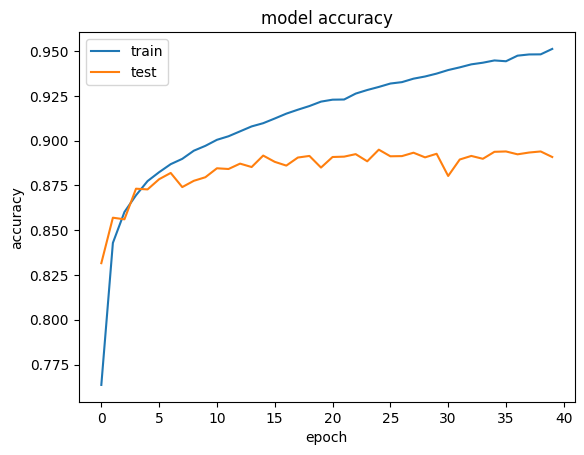

1875/1875 - 4s - loss: 0.1269 - accuracy: 0.9530 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.3814 - accuracy: 0.8909 - 627ms/epoch - 2ms/step
Test 3 accuracy: 0.8909000158309937
Train 3 accuracy: 0.9529500007629395


In [ ]:
def plot_acc(score):
  plt.plot(score.history['accuracy'])
  plt.plot(score.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


print("Modelo 1\n")
plot_acc(model1_score)
train_loss, train_acc = model1.evaluate(fashion_data_train["attributes"], one_hot_target_train, verbose=2)
test_loss, test_acc = model1.evaluate(fashion_data_test["attributes"], one_hot_target_test, verbose=2)
print('Test 1 accuracy:', test_acc)
print('Train 1 accuracy:', train_acc)

print("\nModelo 2\n")
plot_acc(model2_score)
train_loss, train_acc = model2.evaluate(fashion_data_train["attributes"], one_hot_target_train, verbose=2)
test_loss, test_acc = model2.evaluate(fashion_data_test["attributes"], one_hot_target_test, verbose=2)
print('Test 2 accuracy:', test_acc)
print('Train 2 accuracy:', train_acc)

print("\nModelo 3\n")
plot_acc(model3_score)
train_loss, train_acc = model3.evaluate(fashion_data_train["attributes"], one_hot_target_train, verbose=2)
test_loss, test_acc = model3.evaluate(fashion_data_test["attributes"], one_hot_target_test, verbose=2)
print('Test 3 accuracy:', test_acc)
print('Train 3 accuracy:', train_acc)

### b)
Crear una red neuronal con una capa oculta de 50 neuronas y función de activación tipo ReLU.
Entrenar distintos modelos utilizando los siguientes valores de learning rate: 10, 1, 0.1, 0.01, 0.001, 0.0001 y 0.00001.
Graficar cómo varía el accuracy sobre el conjunto de entrenamiento y evaluación para cada entrenamiento.

¿Cómo explica el comportamiento de
la red neuronal en este rango de valores de learning rate?

In [36]:
import matplotlib.pyplot as plt

def plot_acc(score):
  plt.plot(score.history['accuracy'])
  plt.plot(score.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [37]:
# Modelo b) learning rate 10
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784)), # Como el input ya está aplanado la entrada es de 784
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=10),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model_score10 = model.fit(fashion_data_train["attributes"],
                          one_hot_target_train,
                          batch_size=16,
                          epochs=40,
                          validation_data = (fashion_data_test["attributes"], one_hot_target_test))

Epoch 1/40
3750/3750 [==============================] - 16s 3ms/step - loss: 272.8260 - accuracy: 0.1069 - val_loss: 3.0262 - val_accuracy: 0.1000
Epoch 2/40
3750/3750 [==============================] - 11s 3ms/step - loss: 3.7293 - accuracy: 0.1024 - val_loss: 3.6757 - val_accuracy: 0.1000
Epoch 3/40
3750/3750 [==============================] - 17s 5ms/step - loss: 3.6777 - accuracy: 0.0988 - val_loss: 3.6679 - val_accuracy: 0.1000
Epoch 4/40
3750/3750 [==============================] - 12s 3ms/step - loss: 3.7556 - accuracy: 0.0986 - val_loss: 4.3363 - val_accuracy: 0.1000
Epoch 5/40
3750/3750 [==============================] - 11s 3ms/step - loss: 3.7627 - accuracy: 0.0992 - val_loss: 4.0206 - val_accuracy: 0.1000
Epoch 6/40
3750/3750 [==============================] - 11s 3ms/step - loss: 3.7462 - accuracy: 0.1002 - val_loss: 5.2344 - val_accuracy: 0.1000
Epoch 7/40
3750/3750 [==============================] - 12s 3ms/step - loss: 3.7241 - accuracy: 0.1002 - val_loss: 3.6154 - val_

Learning Rate 10



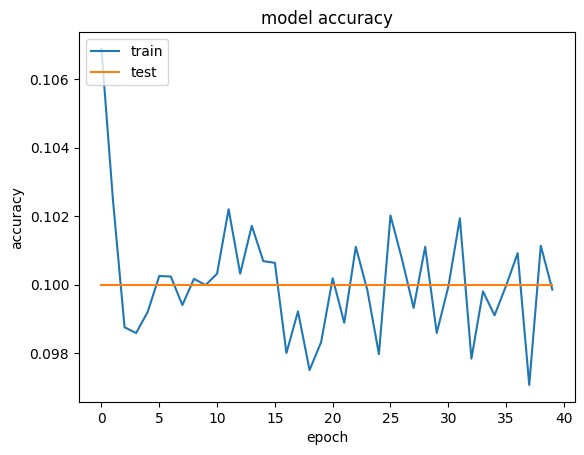

In [38]:
print("Learning Rate 10\n")
plot_acc(model_score10)

In [39]:
# Modelo b) learning rate 1
model2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784)), # Como el input ya está aplanado la entrada es de 784
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model_score1 = model2.fit(fashion_data_train["attributes"],
                          one_hot_target_train,
                          batch_size=16,
                          epochs=40,
                          validation_data = (fashion_data_test["attributes"], one_hot_target_test))

Epoch 1/40
3750/3750 [==============================] - 12s 3ms/step - loss: 5.4496 - accuracy: 0.0996 - val_loss: 2.4009 - val_accuracy: 0.1000
Epoch 2/40
3750/3750 [==============================] - 11s 3ms/step - loss: 2.5982 - accuracy: 0.0971 - val_loss: 2.4211 - val_accuracy: 0.1000
Epoch 3/40
3750/3750 [==============================] - 12s 3ms/step - loss: 2.4644 - accuracy: 0.1016 - val_loss: 2.4125 - val_accuracy: 0.1000
Epoch 4/40
3750/3750 [==============================] - 11s 3ms/step - loss: 2.4678 - accuracy: 0.0981 - val_loss: 2.3813 - val_accuracy: 0.1000
Epoch 5/40
3750/3750 [==============================] - 11s 3ms/step - loss: 2.4655 - accuracy: 0.0998 - val_loss: 2.5024 - val_accuracy: 0.1000
Epoch 6/40
3750/3750 [==============================] - 11s 3ms/step - loss: 2.4619 - accuracy: 0.0991 - val_loss: 2.3789 - val_accuracy: 0.1000
Epoch 7/40
3750/3750 [==============================] - 12s 3ms/step - loss: 2.4661 - accuracy: 0.1006 - val_loss: 2.4428 - val_ac

Learning Rate 1



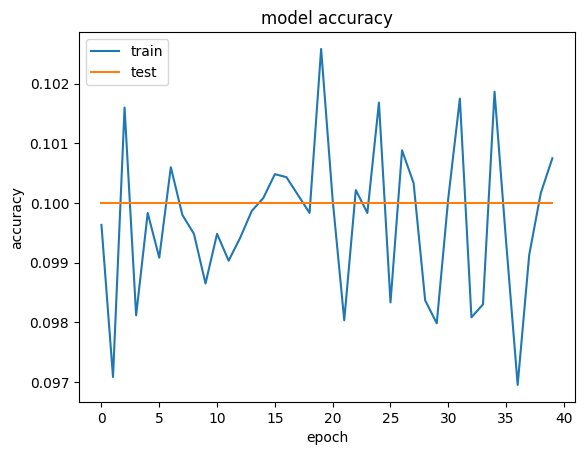

In [40]:
print("Learning Rate 1\n")
plot_acc(model_score1)

In [41]:
# Modelo b) learning rate 0.1
model3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784)), # Como el input ya está aplanado la entrada es de 784
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model_score01 = model3.fit(fashion_data_train["attributes"],
                          one_hot_target_train,
                          batch_size=16,
                          epochs=40,
                          validation_data = (fashion_data_test["attributes"], one_hot_target_test))

Epoch 1/40
3750/3750 [==============================] - 13s 3ms/step - loss: 2.3543 - accuracy: 0.1001 - val_loss: 2.3239 - val_accuracy: 0.1000
Epoch 2/40
3750/3750 [==============================] - 11s 3ms/step - loss: 2.3209 - accuracy: 0.0986 - val_loss: 2.3166 - val_accuracy: 0.1000
Epoch 3/40
3750/3750 [==============================] - 11s 3ms/step - loss: 2.3211 - accuracy: 0.1012 - val_loss: 2.3130 - val_accuracy: 0.1000
Epoch 4/40
3750/3750 [==============================] - 11s 3ms/step - loss: 2.3205 - accuracy: 0.1010 - val_loss: 2.3362 - val_accuracy: 0.1000
Epoch 5/40
3750/3750 [==============================] - 11s 3ms/step - loss: 2.3197 - accuracy: 0.1022 - val_loss: 2.3116 - val_accuracy: 0.1000
Epoch 6/40
3750/3750 [==============================] - 11s 3ms/step - loss: 2.3213 - accuracy: 0.1009 - val_loss: 2.3128 - val_accuracy: 0.1000
Epoch 7/40
3750/3750 [==============================] - 12s 3ms/step - loss: 2.3215 - accuracy: 0.0983 - val_loss: 2.3189 - val_ac

Learning Rate 0.1



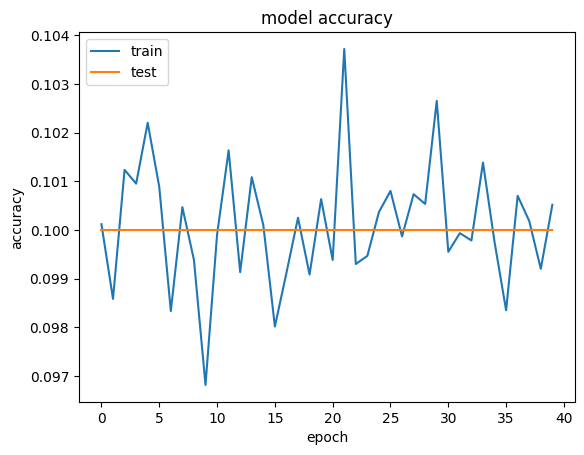

In [42]:
print("Learning Rate 0.1\n")
plot_acc(model_score01)

In [43]:
# Modelo b) learning rate 0.01
model4 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784)), # Como el input ya está aplanado la entrada es de 784
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model_score001 = model4.fit(fashion_data_train["attributes"],
                          one_hot_target_train,
                          batch_size=16,
                          epochs=40,
                          validation_data = (fashion_data_test["attributes"], one_hot_target_test))

Epoch 1/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.5652 - accuracy: 0.8012 - val_loss: 0.4833 - val_accuracy: 0.8386
Epoch 2/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4839 - accuracy: 0.8324 - val_loss: 0.5184 - val_accuracy: 0.8200
Epoch 3/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4614 - accuracy: 0.8415 - val_loss: 0.4432 - val_accuracy: 0.8472
Epoch 4/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4556 - accuracy: 0.8430 - val_loss: 0.4840 - val_accuracy: 0.8327
Epoch 5/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.4408 - accuracy: 0.8485 - val_loss: 0.5014 - val_accuracy: 0.8356
Epoch 6/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4414 - accuracy: 0.8483 - val_loss: 0.4942 - val_accuracy: 0.8418
Epoch 7/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4320 - accuracy: 0.8520 - val_loss: 0.4904 - val_ac

Learning Rate 0.01



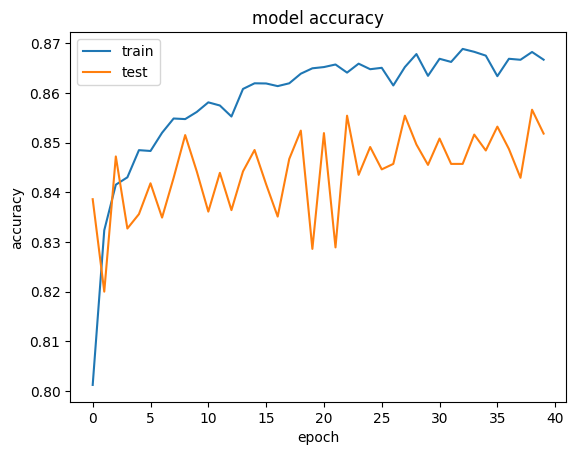

In [44]:
print("Learning Rate 0.01\n")
plot_acc(model_score001)

In [45]:
# Modelo b) learning rate 0.001
model5 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784)), # Como el input ya está aplanado la entrada es de 784
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model_score0001 = model5.fit(fashion_data_train["attributes"],
                          one_hot_target_train,
                          batch_size=16,
                          epochs=40,
                          validation_data = (fashion_data_test["attributes"], one_hot_target_test))

Epoch 1/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.5129 - accuracy: 0.8192 - val_loss: 0.4125 - val_accuracy: 0.8525
Epoch 2/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3889 - accuracy: 0.8598 - val_loss: 0.3727 - val_accuracy: 0.8644
Epoch 3/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3530 - accuracy: 0.8723 - val_loss: 0.3925 - val_accuracy: 0.8615
Epoch 4/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3308 - accuracy: 0.8787 - val_loss: 0.3378 - val_accuracy: 0.8755
Epoch 5/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3129 - accuracy: 0.8854 - val_loss: 0.3603 - val_accuracy: 0.8696
Epoch 6/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3027 - accuracy: 0.8884 - val_loss: 0.3453 - val_accuracy: 0.8712
Epoch 7/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2903 - accuracy: 0.8932 - val_loss: 0.3563 - val_ac

Learning Rate 0.001



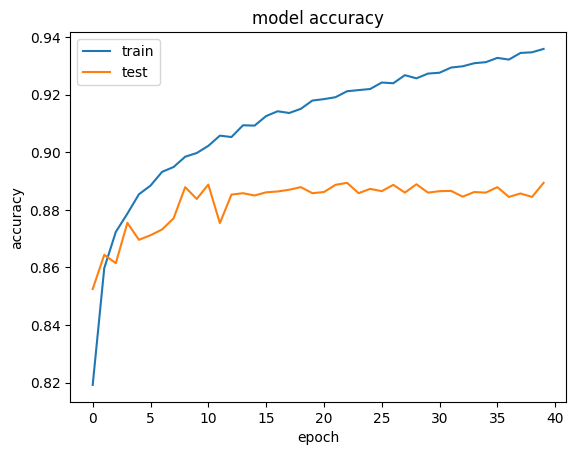

In [46]:
print("Learning Rate 0.001\n")
plot_acc(model_score0001)

In [47]:
# Modelo b) learning rate 0.0001
model6 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784)), # Como el input ya está aplanado la entrada es de 784
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model_score00001 = model6.fit(fashion_data_train["attributes"],
                            one_hot_target_train,
                            batch_size=16,
                            epochs=40,
                            validation_data = (fashion_data_test["attributes"], one_hot_target_test))

Epoch 1/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.7431 - accuracy: 0.7641 - val_loss: 0.5349 - val_accuracy: 0.8252
Epoch 2/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4975 - accuracy: 0.8309 - val_loss: 0.4702 - val_accuracy: 0.8421
Epoch 3/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4516 - accuracy: 0.8451 - val_loss: 0.4456 - val_accuracy: 0.8479
Epoch 4/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4261 - accuracy: 0.8518 - val_loss: 0.4186 - val_accuracy: 0.8579
Epoch 5/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4087 - accuracy: 0.8576 - val_loss: 0.4066 - val_accuracy: 0.8610
Epoch 6/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3953 - accuracy: 0.8619 - val_loss: 0.4095 - val_accuracy: 0.8610
Epoch 7/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3831 - accuracy: 0.8666 - val_loss: 0.3881 - val_ac

Learning Rate 0.0001



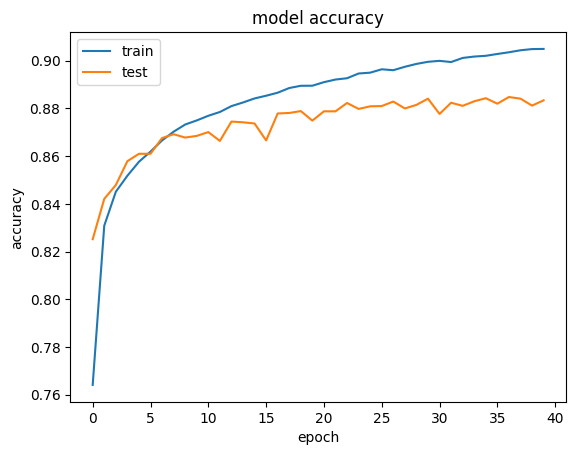

In [48]:
print("Learning Rate 0.0001\n")
plot_acc(model_score00001)

In [49]:
# Modelo b) learning rate 0.00001
model7 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784)), # Como el input ya está aplanado la entrada es de 784
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model_score000001 = model7.fit(fashion_data_train["attributes"],
                              one_hot_target_train,
                              batch_size=16,
                              epochs=40,
                              validation_data = (fashion_data_test["attributes"], one_hot_target_test))

Epoch 1/40
3750/3750 [==============================] - 12s 3ms/step - loss: 1.4297 - accuracy: 0.5504 - val_loss: 0.9970 - val_accuracy: 0.6732
Epoch 2/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.8684 - accuracy: 0.7142 - val_loss: 0.7844 - val_accuracy: 0.7417
Epoch 3/40
3750/3750 [==============================] - 10s 3ms/step - loss: 0.7325 - accuracy: 0.7567 - val_loss: 0.6968 - val_accuracy: 0.7677
Epoch 4/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.6655 - accuracy: 0.7803 - val_loss: 0.6441 - val_accuracy: 0.7894
Epoch 5/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.6229 - accuracy: 0.7951 - val_loss: 0.6083 - val_accuracy: 0.7991
Epoch 6/40
3750/3750 [==============================] - 12s 3ms/step - loss: 0.5924 - accuracy: 0.8050 - val_loss: 0.5825 - val_accuracy: 0.8064
Epoch 7/40
3750/3750 [==============================] - 11s 3ms/step - loss: 0.5695 - accuracy: 0.8122 - val_loss: 0.5617 - val_ac

Learning Rate 0.00001



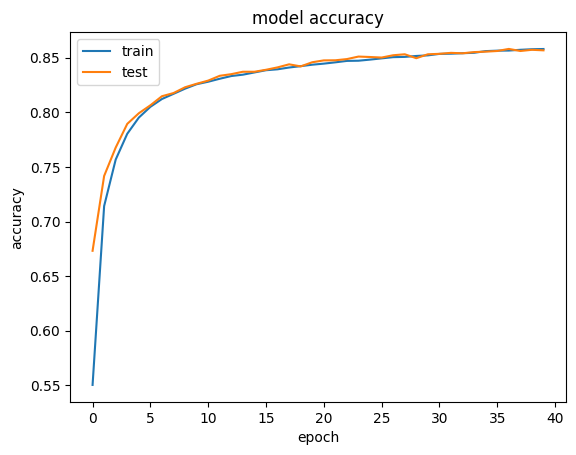

In [50]:
print("Learning Rate 0.00001\n")
plot_acc(model_score000001)